How well do jobs  pay for Data Roles?

Methology

    1.Evaluate median salary for top 6 data roles
    2.Visualize the insights generated from the data

In [10]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [18]:
df_US = df[(df["job_country"] == "United States")].dropna(subset=["salary_year_avg"])


In [21]:
job_titles = df_US["job_title_short"].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [22]:
df_US_top6 = df_US[df_US["job_title_short"].isin(job_titles)]

In [26]:
job_order = df_US_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

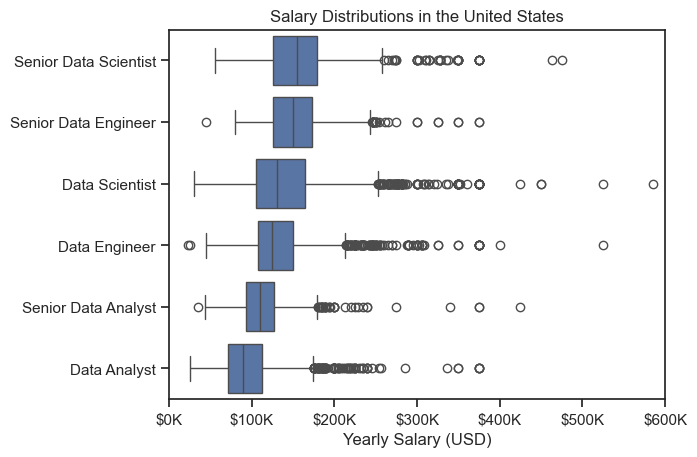

In [27]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()